In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
xls = pd.ExcelFile("TikTok_Dataset.xlsx")
bulgarian_df = pd.read_excel(xls, "Bulgaria")
romanian_df = pd.read_excel(xls, "Romania")
poland_df = pd.read_excel(xls, "Poland")

In [3]:
bulgarian_df.head()

,Post Number,Term,Poster_Username,Num_Likes,Num_Comments,Num_Views,Hashtags_Used,Post_Sentiment,Comments_Sentiment
0,1,War in Ukraine,kyo.fact,12600,4909,391500,#Ukraine will win🇺🇦 #warinukraine🇺🇦 #2023 #fac...,Pro-Ukraine,Mixed Reaction
1,2,War in Ukraine,_nastassiadenz,22300,1018,1500000,#Россия🇷🇺 #Putin's Russia #Putin's stability #...,Pro-Ukraine,Agreement
2,3,War in Ukraine,saveukraine888,12300,800,1200000,"#Feodosia #Crimea #Crimea, Ukraine #port #Russ...",Pro-Ukraine,Agreement
3,4,War in Ukraine,choppedbrain,120200,884,3500000,#wardiary #war2023 #Ukraine #zsu #himars #vsu ...,Pro-Ukraine,Agreement
4,5,War in Ukraine,envy_yep,41100,526,877300,#Prigozhin #zhenyaprigozhin #chkwwanger #wagne...,Unclear,Neutral/Unrelated


Identify view trends among different terms per country

In [4]:
# For Bulgaria
def sum_col(df, col_name):
    war_in_ukraine_count = df.loc[df["Term"] == "War in Ukraine", col_name].value_counts()
    putin_count = df.loc[df["Term"] == "Putin", col_name].value_counts()
    zelensky_count = df.loc[df["Term"] == "Zelensky", col_name].value_counts()
    stand_with_ukraine_count = df.loc[df["Term"] == "Stand with Ukraine", col_name].value_counts()
    stand_with_russia_count = df.loc[df["Term"] == "Stand with Russia", col_name].value_counts()
    return [war_in_ukraine_count, putin_count, zelensky_count, stand_with_ukraine_count, stand_with_russia_count]

In [5]:
def total_col(df, col_name):
    return df[col_name].value_counts()

In [6]:
bulgaria_total_sentiment = total_col(bulgarian_df, "Post_Sentiment")
romania_total_sentiment = total_col(romanian_df, "Post_Sentiment")
poland_total_sentiment = total_col(poland_df, "Post_Sentiment")

In [7]:
total = bulgaria_total_sentiment.add(romania_total_sentiment, fill_value=0)
total = total.add(poland_total_sentiment, fill_value=0)

In [8]:
total

Anti-Putin                     11.0
Anti-Zelensky                  25.0
Informational/Educational     118.0
Isolationalist/Indifferent      5.0
Isolationist/Indifferent       21.0
Neutral                        56.0
Pro-Putin                      54.0
Pro-Russia                     65.0
Pro-Ukraine                    99.0
Pro-Zelensky                   43.0
Unclear                       252.0
Name: Post_Sentiment, dtype: float64

In [9]:
df = bulgarian_df

<AxesSubplot:>

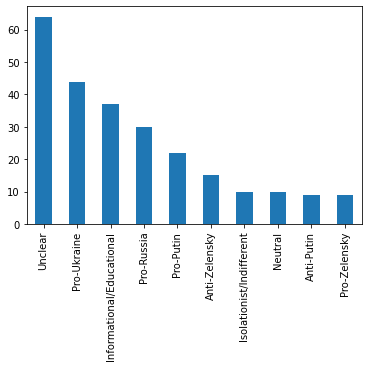

In [10]:
bulgaria_total_sentiment.plot(kind="bar")

<AxesSubplot:>

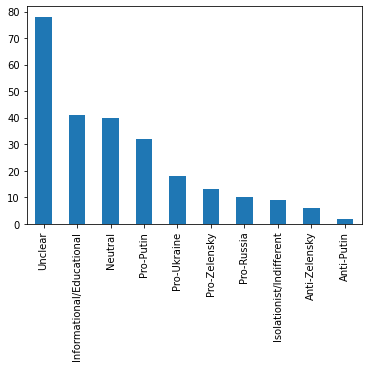

In [11]:
romania_total_sentiment.plot(kind="bar")

<AxesSubplot:>

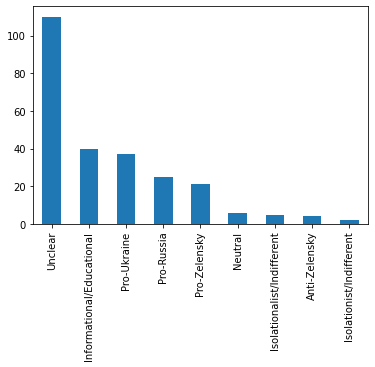

In [12]:
poland_total_sentiment.plot(kind="bar")

<AxesSubplot:>

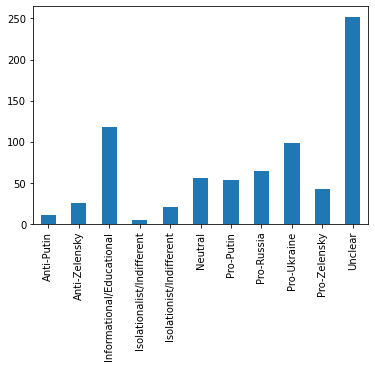

In [13]:
total.plot(kind="bar")

In [14]:
bulgarian_aggregate = sum_col(bulgarian_df, "Post_Sentiment")
romanian_aggregate = sum_col(romanian_df, "Post_Sentiment")
poland_aggregate = sum_col(poland_df, "Post_Sentiment")

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_top_hashtags_per_sentiment_custom_colors_ordered_legend(df, country_name):
    # Ensure handling of NaN and convert to string before splitting
    df['Hashtags_List'] = df['Hashtags_Used'].apply(lambda x: [tag.strip().lower() for tag in str(x).split('#') if tag.strip()])

    # Explode the DataFrame such that each hashtag gets its own row but retains the original post's sentiment
    exploded_df = df.explode('Hashtags_List')

    # Count Frequencies of Hashtags per Sentiment
    hashtag_sentiment_counts = exploded_df.groupby(['Post_Sentiment', 'Hashtags_List']).size().reset_index(name='Count')

    # Filter to show only the top 3 hashtags per sentiment category
    top_hashtags_per_sentiment = hashtag_sentiment_counts.sort_values(['Post_Sentiment', 'Count'], ascending=[True, False]) \
                                        .groupby('Post_Sentiment').head(3)

    # Define a custom color palette with distinct colors for each sentiment
    custom_palette = {
        'Pro-Russia': '#003f5c',
        'Pro-Putin': '#2f4b7c',
        'Anti-Zelensky': '#665191',
        'Isolationist/Indifferent': '#a05195',
        'Unclear': '#d45087',
        'Neutral': '#f95d6a',
        'Informational/Educational': '#ff7c43',
        'Anti-Putin': '#ffa600',
        'Pro-Zelensky': '#ff7c00',
        'Pro-Ukraine': '#ff6e00'
    }
    
    # Ensure the order of sentiments matches the desired color scheme
    sentiment_order = ['Pro-Russia', 'Pro-Putin', 'Anti-Zelensky', 'Isolationist/Indifferent', 'Unclear', 
                       'Neutral', 'Informational/Educational', 'Anti-Putin', 'Pro-Zelensky', 'Pro-Ukraine']

    # Apply the custom color palette to the barplot
    plt.figure(figsize=(14, 9))
    barplot = sns.barplot(x='Count', y='Hashtags_List', hue='Post_Sentiment', data=top_hashtags_per_sentiment,
                          palette=[custom_palette.get(x) for x in sentiment_order])
    plt.title(f'Top 3 Hashtags per Post Sentiment for {country_name}', fontsize=16)
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Hashtags', fontsize=14)

    # Reorder the legend
    handles, labels = barplot.get_legend_handles_labels()
    ordered_handles = [handles[sentiment_order.index(lab)] for lab in labels if lab in sentiment_order]
    ordered_labels = [lab for lab in labels if lab in sentiment_order]
    plt.legend(ordered_handles, ordered_labels, title='Post Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()


C:\Users\arnib\AppData\Local\Temp/ipykernel_20660/3719403453.py:50: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from current font.
  plt.tight_layout()
C:\Users\arnib\AppData\Local\Temp/ipykernel_20660/3719403453.py:50: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from current font.
  plt.tight_layout()
C:\Users\arnib\AppData\Local\Temp/ipykernel_20660/3719403453.py:50: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  plt.tight_layout()
C:\Users\arnib\AppData\Local\Temp/ipykernel_20660/3719403453.py:50: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  plt.tight_layout()
c:\Users\arnib\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\arnib\AppData\Loca

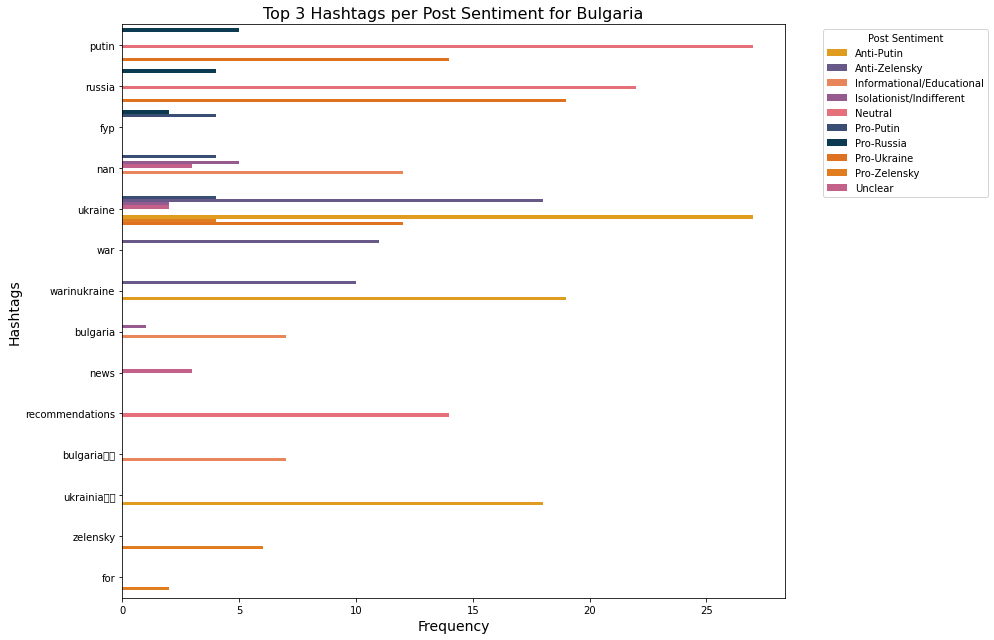

In [62]:
visualize_top_hashtags_per_sentiment_custom_colors_ordered_legend(bulgarian_df, 'Bulgaria')


In [56]:
# Define a function to visualize the top hashtags per sentiment for a given country DataFrame
def visualize_top_hashtags_per_sentiment(df, country_name):
    # Ensure handling of NaN and convert to string before splitting
    df["Hashtags_List"] = df["Hashtags_Used"].apply(lambda x: [tag.strip().lower() for tag in str(x).split("#") if tag.strip()])

    # Explode the DataFrame such that each hashtag gets its own row but retains the original post"s sentiment
    exploded_df = df.explode("Hashtags_List")

    # Count Frequencies of Hashtags per Sentiment
    hashtag_sentiment_counts = exploded_df.groupby(["Post_Sentiment", "Hashtags_List"]).size().reset_index(name="Count")

    # Filter to show only the top 3 hashtags per sentiment category
    top_hashtags_per_sentiment = hashtag_sentiment_counts.sort_values(["Post_Sentiment", "Count"], ascending=[True, False]) \
                                        .groupby("Post_Sentiment").head(3)
    
    print(top_hashtags_per_sentiment)

    # Visualizing the top hashtags for each sentiment category
    plt.figure(figsize=(12, 8))
    sns.barplot(x="Count", y="Hashtags_List", hue="Post_Sentiment", data=top_hashtags_per_sentiment, palette="viridis")
    plt.title(f"Top 3 Hashtags per Post Sentiment for {country_name}", fontsize=16)
    plt.xlabel("Frequency", fontsize=14)
    plt.ylabel("Hashtags", fontsize=14)
    plt.legend(title="Post Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


### Bulgaria
- Pro-Ukraine: The top hashtags include '#ukraine', '#warinukraine', and '#ukrainia🇺🇦', indicating a focus on the Ukrainian perspective and the war.
    
- Unclear: Hashtags such as '#russia', '#putin', and '#ukraine' are prevalent, reflecting a mix of topics without a clear stance.
    
- Informational/Educational: Includes '#ukraine', '#war', and '#warinukraine', suggesting a focus on providing information about the conflict.
    
- Pro-Russian: Features '#warinukraine', '#ukraine', and '#muraev', indicating discussions around the war and specific figures.
    
- Pro-Putin: Dominated by hashtags like '#putin' and '#russia', showing strong support for the Russian president.
    
- Anti-Putin and Anti-Zelensky: Both sentiments use direct references to the leaders ('#putin', '#zelensky') with negative connotations or criticism.
    
- Pro-Zelensky: Shows support with hashtags like '#zelensky' and '#ukrainiantiktok'.
    
- Neutral and Isolationist/Indifferent: Either non-specific ('#nan', '#news') or indicating a lack of clear stance towards the conflict.
    
- Pro-Russia: Interestingly, this sentiment includes non-specific hashtags ('#nan') and references to Bulgaria, indicating localized discussions or perspectives.

### Romania
- Neutral: Common hashtags include '#ukraine', '#news', and '#russia', indicating a focus on news-related content.
    
- Informational/Educational: '#fyp', '#rusia', and '#news' are prevalent, suggesting informational content.
    
- Isolationist/Indifferent: Hashtags like '#fypshiviral' and '#fypshi' indicate a general or varied content focus.
    
- Unclear: '#fyp', '#rusia', '#ukraine', and '#putin' are common, showing mixed or general content.
    
- Pro-Ukraine: Includes '#ucraina', '#rusia', and '#fyp', reflecting support for Ukraine.
    
- Pro-Russia: '#rusia', '#putin', '#alephnews' indicate a pro-Russia stance.
    
- Anti-Putin: Hashtags include '#news' and '#putin', suggesting criticism.
    
- Pro-Putin: Dominated by '#putin', '#russia', and '#president', showing strong support for Putin.
    
- Pro-Zelensky: '#zelensky' and '#ukraine' are key, indicating support for Zelensky.
    
- Anti-Zelensky: Includes '#zelensky' and '#ukraine', but with a negative sentiment.

### Poland    
- Unclear: Features hashtags like '#ukraine', '#putin', and '#dlaciebie', indicating varied or general content.
    
- Informational/Educational: '#ukraina', '#wojnanaukrainie', and '#wojna' are common, suggesting a focus on the conflict.
    
- Isolationist/Indifferent: Unique hashtags such as '#rolnik' and '#rolnictwo', which are unrelated to the conflict, indicating diverse content.
    
- Pro-Ukraine: Includes '#wojnanaukrainie', '#ukraina', and '#wojna', showing support for Ukraine.
    
- Pro-Russia: Dominated by '#putin' and '#lider', indicating support for Russia.
    
- Pro-Zelensky: Features '#volodymyrzelensky' and '#ukraine🇺🇦', showing support for Zelensky.

                 Post_Sentiment    Hashtags_List  Count
19                   Anti-Putin            putin      5
29                   Anti-Putin           russia      4
8                    Anti-Putin              fyp      2
62                Anti-Zelensky              fyp      4
74                Anti-Zelensky              nan      4
83                Anti-Zelensky          ukraine      4
285   Informational/Educational          ukraine     18
302   Informational/Educational              war     11
306   Informational/Educational     warinukraine     10
329    Isolationist/Indifferent              nan      5
340    Isolationist/Indifferent          ukraine      2
320    Isolationist/Indifferent         bulgaria      1
356                     Neutral              nan      3
358                     Neutral             news      3
367                     Neutral          ukraine      2
424                   Pro-Putin            putin     27
441                   Pro-Putin           russia

C:\Users\arnib\AppData\Local\Temp/ipykernel_20660/1109919608.py:25: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from current font.
  plt.tight_layout()
C:\Users\arnib\AppData\Local\Temp/ipykernel_20660/1109919608.py:25: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from current font.
  plt.tight_layout()
C:\Users\arnib\AppData\Local\Temp/ipykernel_20660/1109919608.py:25: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  plt.tight_layout()
C:\Users\arnib\AppData\Local\Temp/ipykernel_20660/1109919608.py:25: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  plt.tight_layout()
c:\Users\arnib\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\arnib\AppData\Loca

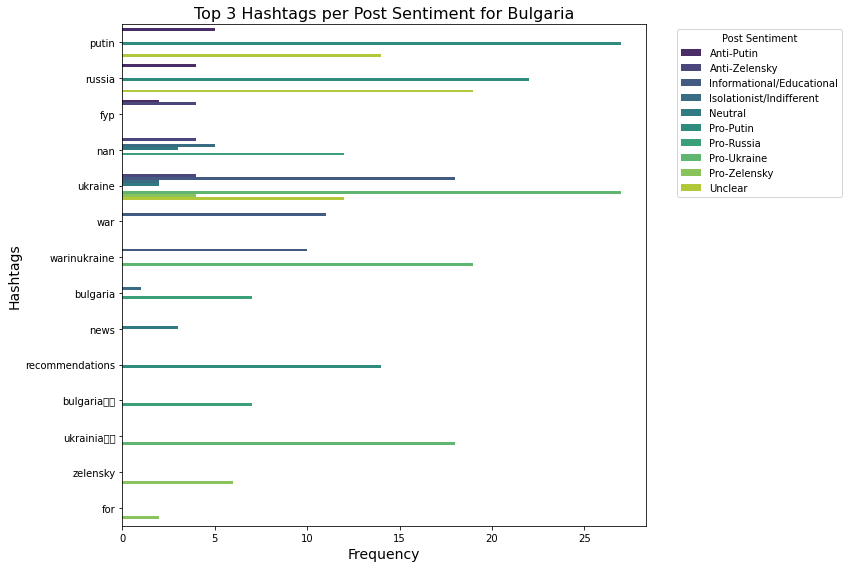

                 Post_Sentiment      Hashtags_List  Count
4                    Anti-Putin               news      2
5                    Anti-Putin              putin      2
0                    Anti-Putin             c4news      1
61                Anti-Zelensky           zelensky      6
44                Anti-Zelensky            ukraine      4
19                Anti-Zelensky                fyp      3
105   Informational/Educational                fyp     10
162   Informational/Educational              rusia      9
136   Informational/Educational               news      8
232    Isolationist/Indifferent             fypshi      2
233    Isolationist/Indifferent        fypshiviral      2
256    Isolationist/Indifferent            respect      2
452                     Neutral            ukraine     22
378                     Neutral               news     15
414                     Neutral             russia     11
507                   Pro-Putin              putin     34
508           

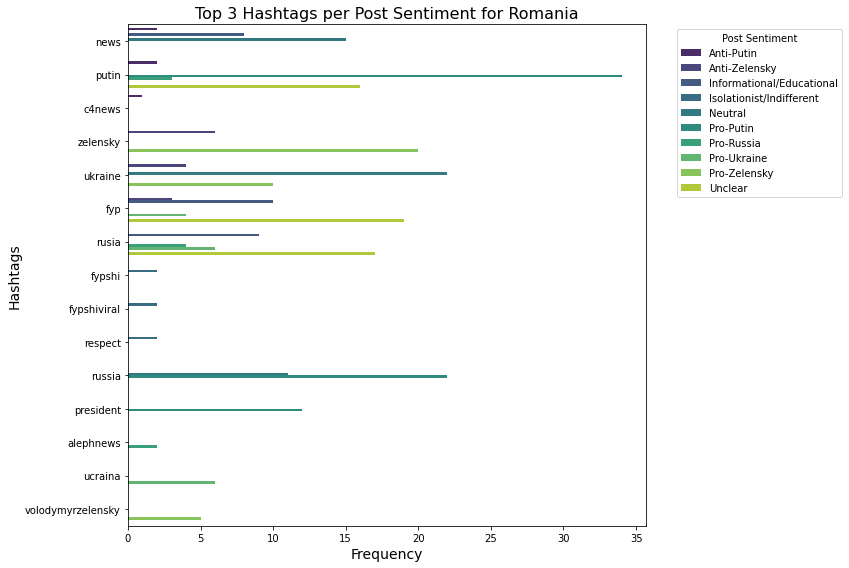

                  Post_Sentiment      Hashtags_List  Count
1                  Anti-Zelensky                 dc      2
2                  Anti-Zelensky          dlaciebie      2
4                  Anti-Zelensky             foryou      2
147    Informational/Educational            ukraina     16
162    Informational/Educational    wojnanaukrainie     14
161    Informational/Educational              wojna     12
192   Isolationalist/Indifferent                 dc      4
215   Isolationalist/Indifferent             polska      4
229   Isolationalist/Indifferent            ukraina      4
242     Isolationist/Indifferent                  d      1
243     Isolationist/Indifferent          dietetykd      1
244     Isolationist/Indifferent    dietetykonlinem      1
340                      Neutral            ukraine      5
289                      Neutral                fyp      3
314                      Neutral              putin      3
392                   Pro-Russia              putin     

C:\Users\arnib\AppData\Local\Temp/ipykernel_20660/1109919608.py:25: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  plt.tight_layout()
C:\Users\arnib\AppData\Local\Temp/ipykernel_20660/1109919608.py:25: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  plt.tight_layout()
c:\Users\arnib\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\arnib\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


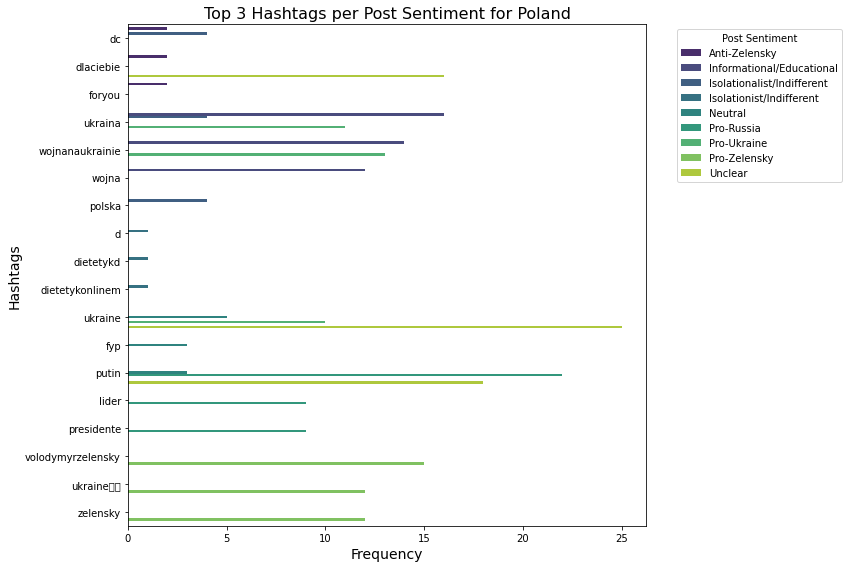

In [57]:
#Visualizing for Bulgaria
visualize_top_hashtags_per_sentiment(bulgarian_df, "Bulgaria")

# Visualizing for Romania
visualize_top_hashtags_per_sentiment(romanian_df, "Romania")

# Visualizing for Poland
visualize_top_hashtags_per_sentiment(poland_df, "Poland")


In [19]:
def process_and_visualize_sentiment_alignment(df, country_name):
    """
    Process the raw DataFrame to categorize comment sentiment alignment,
    aggregate by post sentiment, and visualize the results.
    
    Parameters:
    - df: The raw DataFrame for a specific country.
    - country_name: The name of the country (for labeling purposes).
    """
    # Step 1: Categorize Comment Sentiment Alignment
    conditions = [
        (df['Comments_Sentiment'] == 'Agreement'),
        (df['Comments_Sentiment'] == 'Disagreement'),
        ((df['Comments_Sentiment'] == 'Mixed Reaction') | (df['Comments_Sentiment'] == 'Neutral/Unrelated')),
    ]
    choices = ['Agreement', 'Disagreement', 'Mixed Reaction']
    df['Comment_Sentiment_Alignment'] = np.select(conditions, choices, default='Unclear')
    
    # Step 2: Aggregate Data by Post Sentiment and Comment Sentiment Alignment
    alignment_aggregation = df.groupby('Post_Sentiment')['Comment_Sentiment_Alignment'].value_counts().unstack(fill_value=0)
    
    # Step 3: Visualize the Aggregated Data
    alignment_aggregation.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
    plt.title(f'Comment Sentiment Alignment for Each Post Sentiment in {country_name}')
    plt.xlabel('Post Sentiment')
    plt.ylabel('Count of Posts')
    plt.xticks(rotation=45)
    plt.legend(title='Comment Sentiment Alignment')
    plt.tight_layout()
    plt.show()

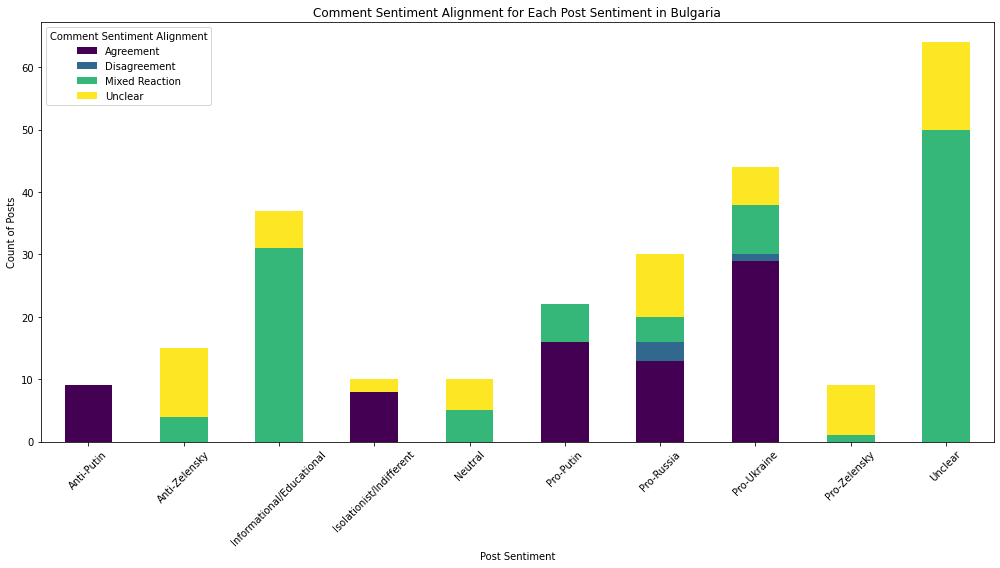

In [20]:
process_and_visualize_sentiment_alignment(bulgarian_df, "Bulgaria")

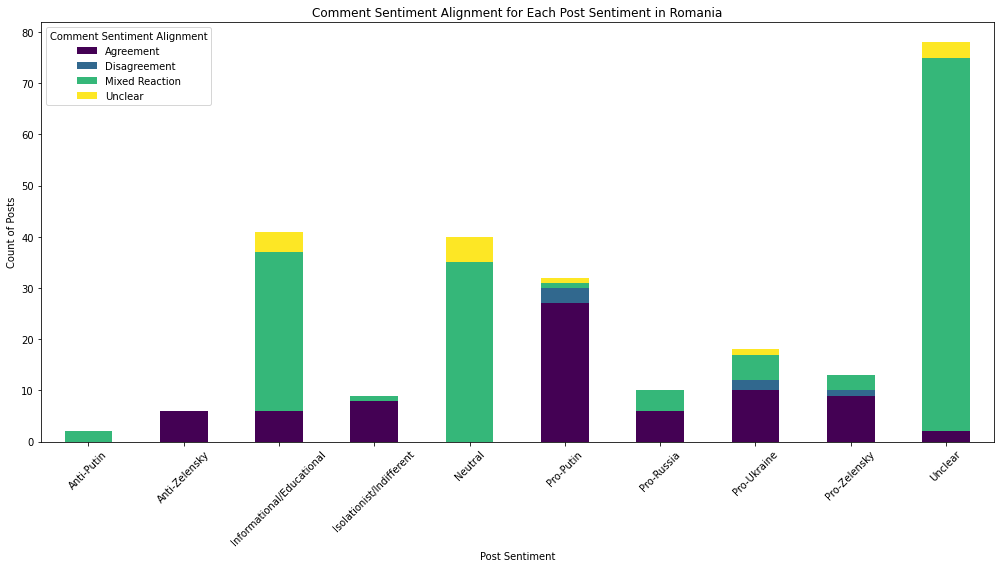

In [21]:
process_and_visualize_sentiment_alignment(romanian_df, "Romania")

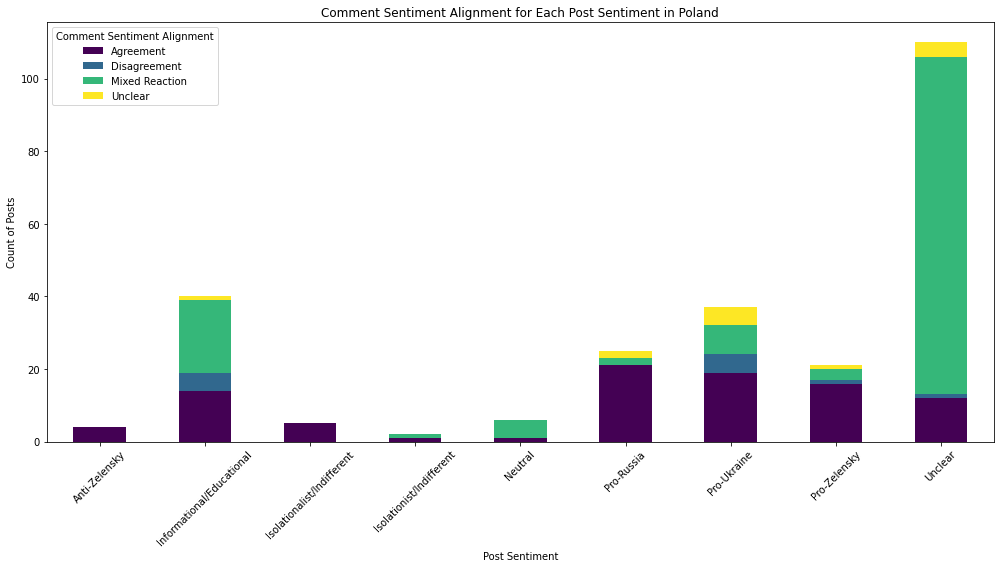

In [22]:
process_and_visualize_sentiment_alignment(poland_df, "Poland")

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

def engagement_vs_sentiment(df, country_name):
    """
    Analyze and visualize the relationship between post engagement (likes, comments, views)
    and post sentiment.
    
    Parameters:
    - df: DataFrame containing the posts' data, including engagement metrics and sentiment.
    - country_name: The name of the country for labeling purposes in the visualization.
    """
    # Step 1: Aggregate Engagement Metrics by Sentiment
    engagement_agg = df.groupby('Post_Sentiment')[['Num_Likes', 'Num_Comments', 'Num_Views']].mean().reset_index()
    
    # Step 2: Visualization
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
    sns.barplot(x='Post_Sentiment', y='Num_Likes', data=engagement_agg, ax=axs[0], palette='coolwarm')
    axs[0].set_title(f'Average Likes by Post Sentiment in {country_name}')
    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha="right")
    
    sns.barplot(x='Post_Sentiment', y='Num_Comments', data=engagement_agg, ax=axs[1], palette='coolwarm')
    axs[1].set_title(f'Average Comments by Post Sentiment in {country_name}')
    axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha="right")
    
    sns.barplot(x='Post_Sentiment', y='Num_Views', data=engagement_agg, ax=axs[2], palette='coolwarm')
    axs[2].set_title(f'Average Views by Post Sentiment in {country_name}')
    axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha="right")
    
    plt.tight_layout()
    plt.show()

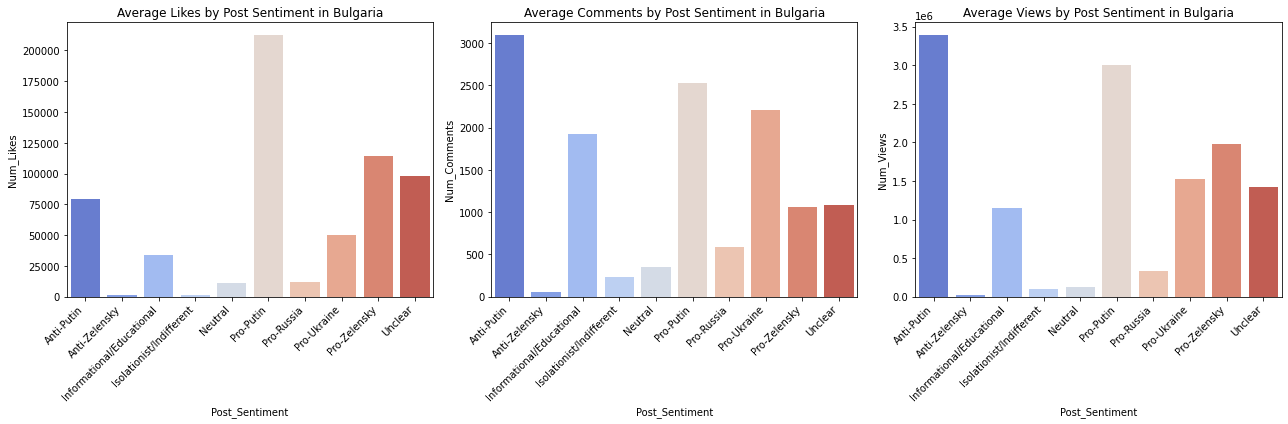

In [24]:
engagement_vs_sentiment(bulgarian_df, 'Bulgaria')

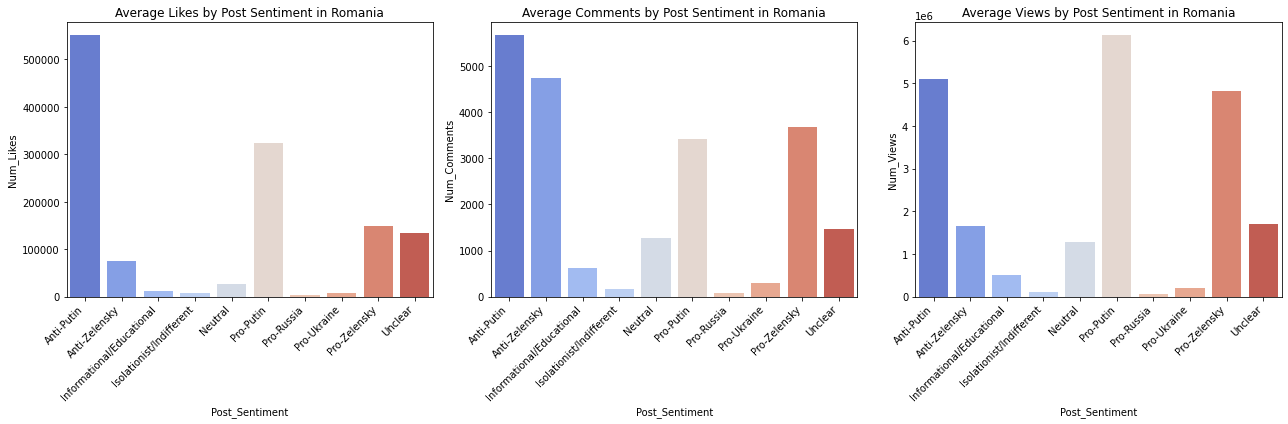

In [25]:
engagement_vs_sentiment(romanian_df, "Romania")

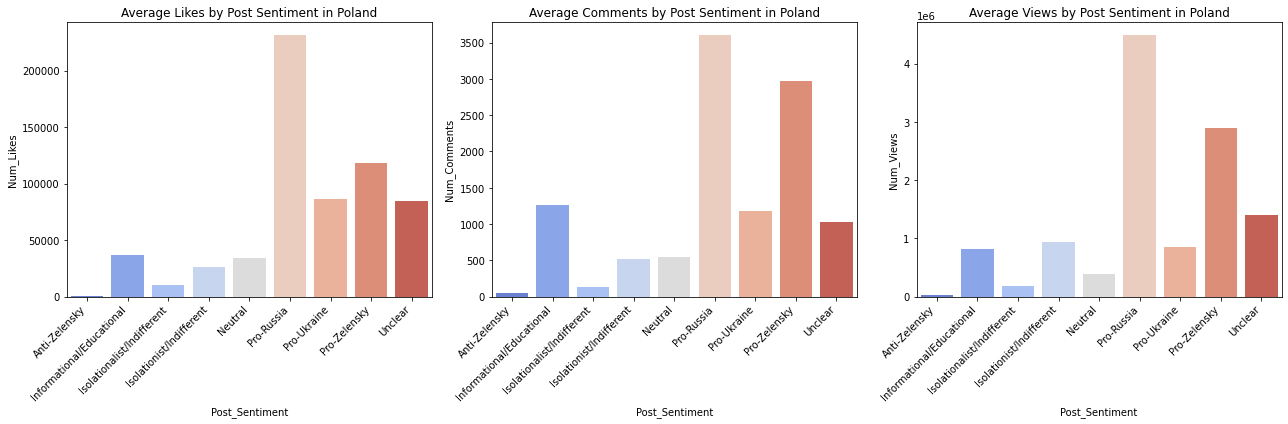

In [26]:
engagement_vs_sentiment(poland_df, "Poland")

In [27]:
def engagement_vs_sentiment_boxplots(df, country_name):
    """
    Generate box plots to analyze the distribution of engagement metrics (likes, comments, views)
    for each post sentiment category.
    
    Parameters:
    - df: DataFrame containing the posts' data, including engagement metrics and sentiment.
    - country_name: The name of the country for labeling purposes in the visualization.
    """
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
    # Views vs Sentiment
    sns.boxplot(x='Post_Sentiment', y='Num_Views', data=df, ax=axs[2], palette='Set3')
    axs[0].set_title(f'Views by Post Sentiment in {country_name}')
    axs[0].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha="right")
    axs[0].set_yscale('log')  # Use logarithmic scale if data varies greatly

    # Likes vs Sentiment
    sns.boxplot(x='Post_Sentiment', y='Num_Likes', data=df, ax=axs[0], palette='Pastel1')
    axs[1].set_title(f'Likes by Post Sentiment in {country_name}')
    axs[1].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha="right")
    axs[1].set_yscale('log')  # Use logarithmic scale if data varies greatly
    
    # Comments vs Sentiment
    sns.boxplot(x='Post_Sentiment', y='Num_Comments', data=df, ax=axs[1], palette='Pastel2')
    axs[2].set_title(f'Comments by Post Sentiment in {country_name}')
    axs[2].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha="right")
    axs[2].set_yscale('log')  # Use logarithmic scale if data varies greatly
    
    plt.tight_layout()
    plt.show()

C:\Users\arnib\AppData\Local\Temp/ipykernel_20660/3740326531.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha="right")
C:\Users\arnib\AppData\Local\Temp/ipykernel_20660/3740326531.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha="right")


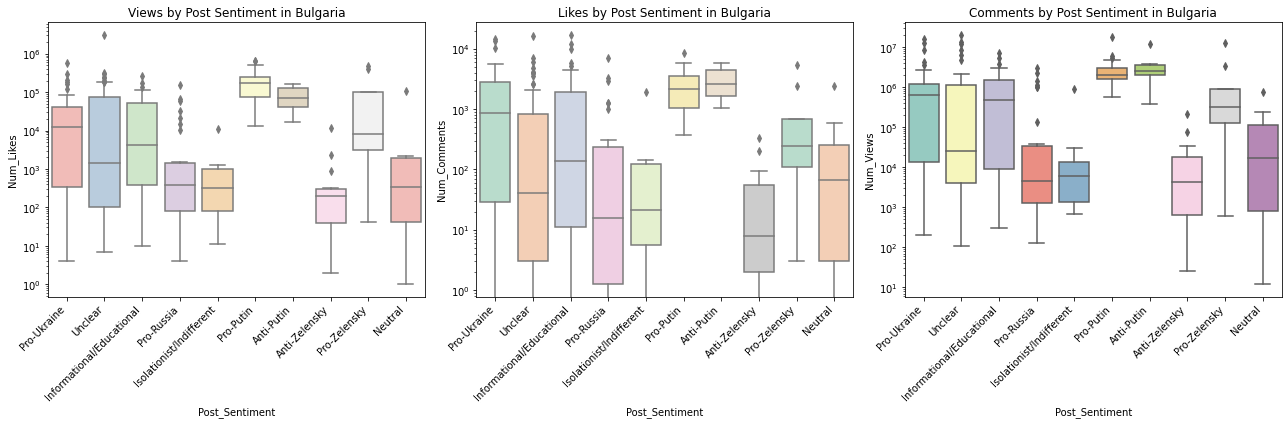

In [28]:
engagement_vs_sentiment_boxplots(bulgarian_df, "Bulgaria")

C:\Users\arnib\AppData\Local\Temp/ipykernel_20660/3740326531.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha="right")
C:\Users\arnib\AppData\Local\Temp/ipykernel_20660/3740326531.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha="right")


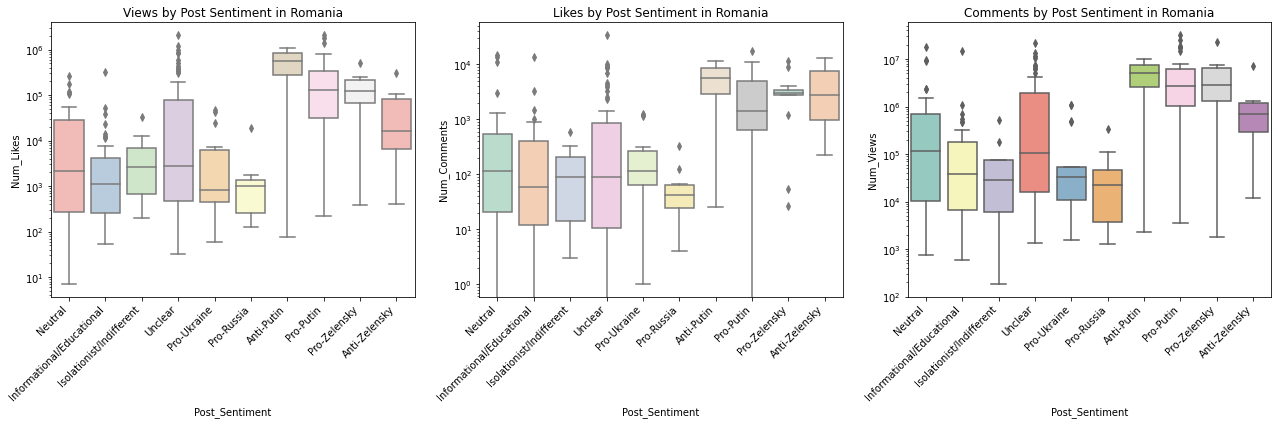

In [29]:
engagement_vs_sentiment_boxplots(romanian_df, "Romania")

C:\Users\arnib\AppData\Local\Temp/ipykernel_20660/3740326531.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha="right")
C:\Users\arnib\AppData\Local\Temp/ipykernel_20660/3740326531.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha="right")


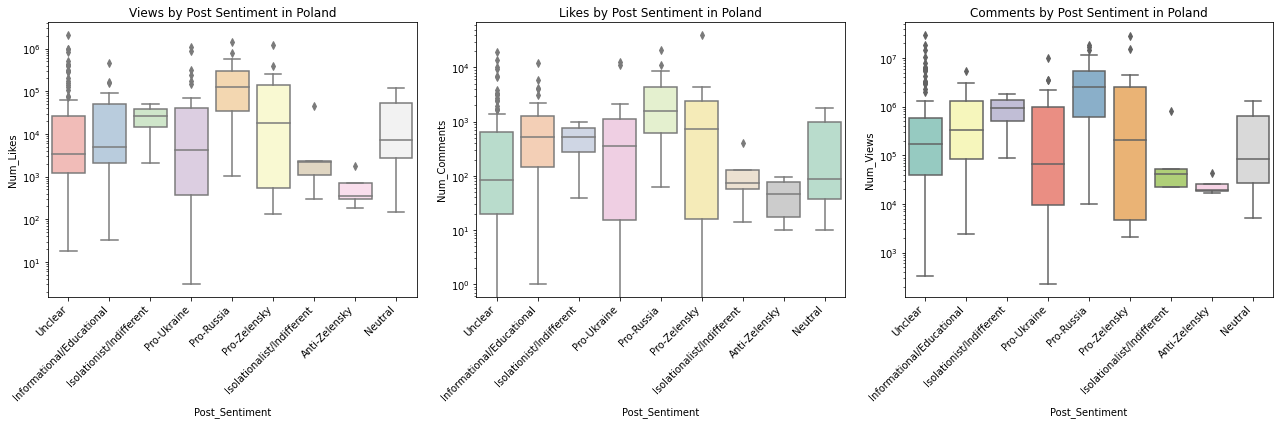

In [30]:
engagement_vs_sentiment_boxplots(poland_df, "Poland")

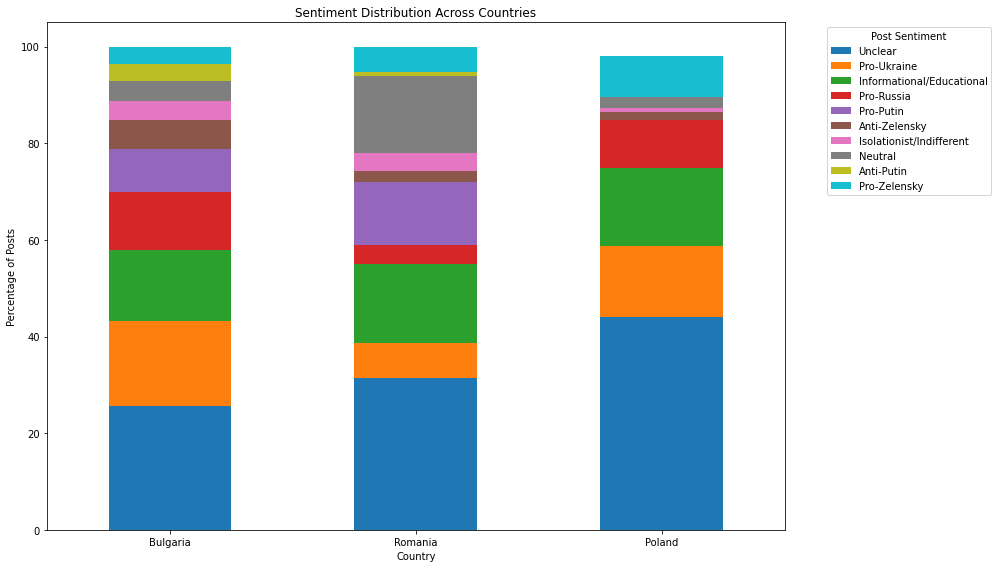

In [31]:
# Assuming sheets_dict is a dictionary with keys being country names and values being the respective DataFrames
sheets_dict = {'Bulgaria': bulgarian_df, 'Romania': romanian_df, 'Poland': poland_df}

# Step 2 & 3: Aggregate sentiment data and combine
sentiment_distribution_across_countries = pd.DataFrame()

for country, df in sheets_dict.items():
    sentiment_distribution = df['Post_Sentiment'].value_counts(normalize=True) * 100
    sentiment_distribution_across_countries[country] = sentiment_distribution

# Transpose for easier plotting
sentiment_distribution_across_countries = sentiment_distribution_across_countries.transpose()

# Step 4: Visualize
sentiment_distribution_across_countries.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab10')
plt.title('Sentiment Distribution Across Countries')
plt.xlabel('Country')
plt.ylabel('Percentage of Posts')
plt.xticks(rotation=0)
plt.legend(title='Post Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

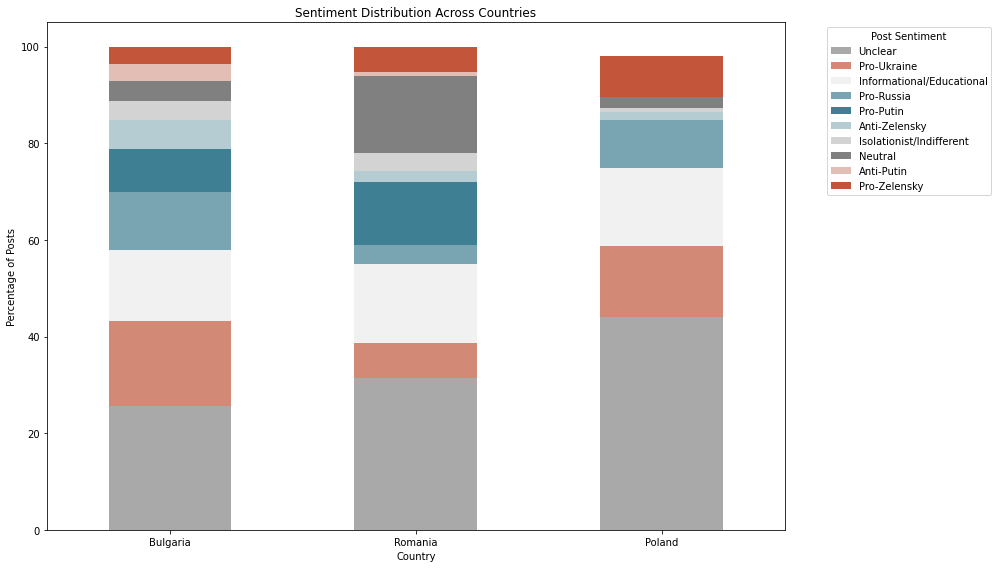

In [32]:
palette = sns.diverging_palette(220, 20, n=7)

# Generate a list with colors for each sentiment - this is just an example, you might want to customize it
custom_colors = {
    'Pro-Ukraine': palette[5],
    'Informational/Educational': palette[3],
    'Pro-Russia': palette[1],
    'Pro-Putin': palette[0],
    'Anti-Zelensky': palette[2],
    'Isolationist/Indifferent': 'lightgray',
    'Neutral': 'gray',
    'Anti-Putin': palette[4],
    'Pro-Zelensky': palette[6],
    'Unclear': 'darkgrey',
    'Pro-Russian': palette[1],  # Using same color as 'Pro-Russia' for consistency
}

# Map each sentiment to its color in the DataFrame
color_mapping = sentiment_distribution_across_countries.columns.map(custom_colors)

# Now plot using the custom color mapping
sentiment_distribution_across_countries.plot(kind='bar', stacked=True, figsize=(14, 8), color=color_mapping)
plt.title('Sentiment Distribution Across Countries')
plt.xlabel('Country')
plt.ylabel('Percentage of Posts')
plt.xticks(rotation=0)
plt.legend(title='Post Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()